# Machine Learning Case Study Part 2

# Dataset Visualization

In [1]:
#importing necessary libraries
import pandas as pd
import seaborn as sns
data = pd.read_csv('wine.csv')

In [2]:
#display the dataset
data

,Type,Alcohol,Malic_Acid,Ash,Ash_Alcalinity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280_OD315,Proline
0,A,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,A,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,A,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,A,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,A,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,C,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,C,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,C,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,C,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
# Checking for Null Values
print(pd.isnull(data).sum())

Type                    0
Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcalinity          0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280_OD315             0
Proline                 0
dtype: int64


In [4]:
# Describing the Dataset
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcalinity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280_OD315,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [5]:
# Correlation
corr = data.corr()
corr.shape

(13, 13)

<AxesSubplot:>

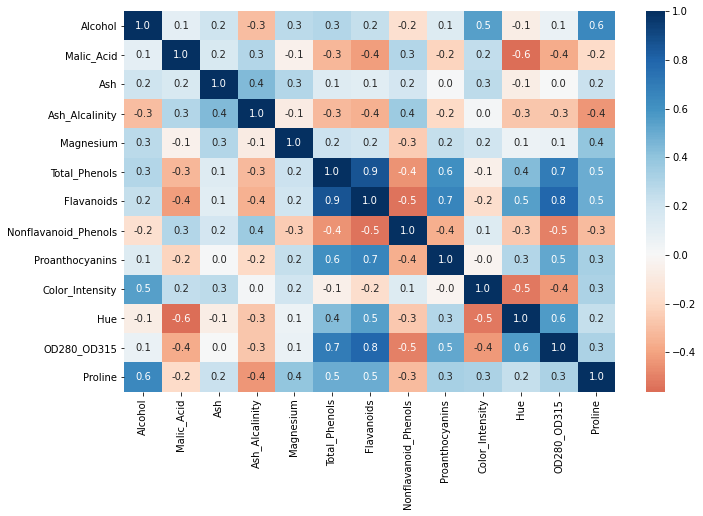

In [6]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.heatmap(corr, annot=True, fmt='.1f', cmap='RdBu', center=0, ax=ax)

# DBSCAN

In [7]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

In [8]:
#loading the dataset
data = load_wine().data

In [9]:
#Normalization method
stscaler = StandardScaler().fit(data)
X = stscaler.transform(data)

Text(0, 0.5, 'Feature 1')

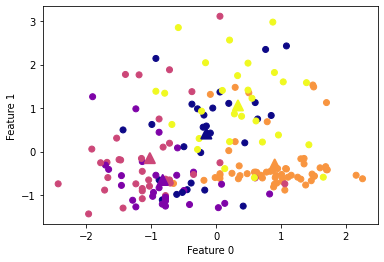

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
# cluster the data into 5 clusters

kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# plot the cluster assignment and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap="plasma")
plt.scatter(kmeans.cluster_centers_[:, 0],   
            kmeans.cluster_centers_[:, 1],
            marker='^', 
            c=[0, 1, 2, 3, 4], 
            s=100, 
            linewidth=2,
            cmap="plasma")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


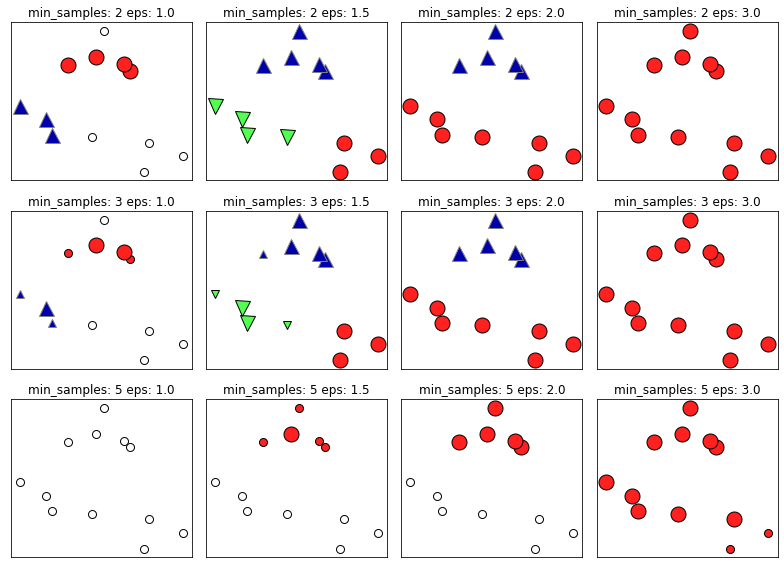

In [11]:
# CLuster changing according to the parameters
import mglearn
mglearn.plots.plot_dbscan()

Minimum Samples :  2


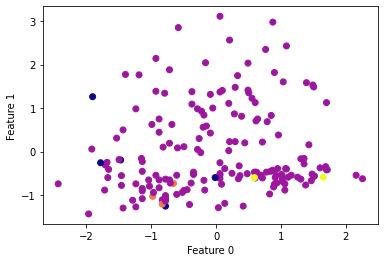

Silhouette Coefficient: 0.134258
Minimum Samples :  3


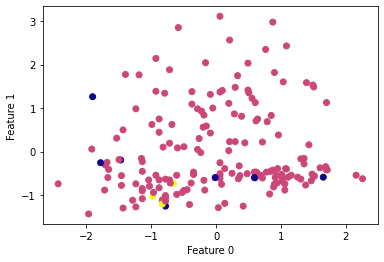

Silhouette Coefficient: 0.191097
Minimum Samples :  4


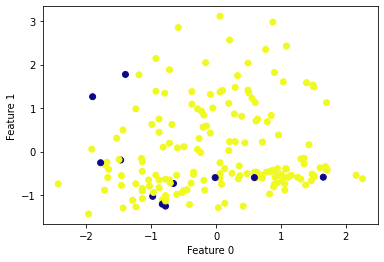

Silhouette Coefficient: 0.218364
Minimum Samples :  5


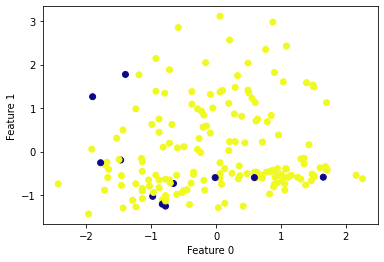

Silhouette Coefficient: 0.218364
Minimum Samples :  6


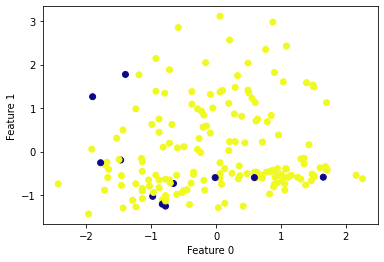

Silhouette Coefficient: 0.218364
Minimum Samples :  7


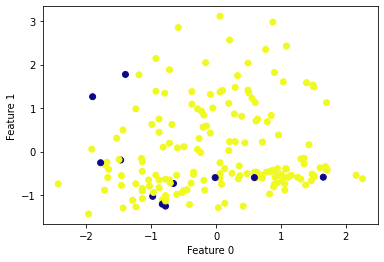

Silhouette Coefficient: 0.218364


In [12]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
for i in range(2,8):
    dbscan = DBSCAN(eps=3, min_samples = i)
    print ("Minimum Samples : ",i)
    clusters = dbscan.fit_predict(X_scaled)
    # plot the cluster assignments
    plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap="plasma")
    plt.xlabel("Feature 0")
    plt.ylabel("Feature 1")
    plt.show()
    print("Silhouette Coefficient: %f" % metrics.silhouette_score(X_scaled, clusters))

- From the above Silhouette Coefficient, we can say that the eps value 3 with 4 minimum samples is better as its silhouette score is greater than that of 2 and 3 minimum samples.

# Hopkins Test

In [13]:
from sklearn import datasets
from pyclustertend import hopkins
from sklearn.preprocessing import scale

In [14]:
X = datasets.load_wine().data

In [15]:
type(X)

numpy.ndarray

In [16]:
X[0:8]

array([[1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
        3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, 1.120e+01, 1.000e+02, 2.650e+00,
        2.760e+00, 2.600e-01, 1.280e+00, 4.380e+00, 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, 1.860e+01, 1.010e+02, 2.800e+00,
        3.240e+00, 3.000e-01, 2.810e+00, 5.680e+00, 1.030e+00, 3.170e+00,
        1.185e+03],
       [1.437e+01, 1.950e+00, 2.500e+00, 1.680e+01, 1.130e+02, 3.850e+00,
        3.490e+00, 2.400e-01, 2.180e+00, 7.800e+00, 8.600e-01, 3.450e+00,
        1.480e+03],
       [1.324e+01, 2.590e+00, 2.870e+00, 2.100e+01, 1.180e+02, 2.800e+00,
        2.690e+00, 3.900e-01, 1.820e+00, 4.320e+00, 1.040e+00, 2.930e+00,
        7.350e+02],
       [1.420e+01, 1.760e+00, 2.450e+00, 1.520e+01, 1.120e+02, 3.270e+00,
        3.390e+00, 3.400e-01, 1.970e+00, 6.750e+00, 1.050e+00, 2.850e+00,
        1.45

In [17]:
Y = scale(X) # Centered on mean and in std devn

In [18]:
Y[0:8]

array([[ 1.51861254, -0.5622498 ,  0.23205254, -1.16959318,  1.91390522,
         0.80899739,  1.03481896, -0.65956311,  1.22488398,  0.25171685,
         0.36217728,  1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, -2.49084714,  0.01814502,
         0.56864766,  0.73362894, -0.82071924, -0.54472099, -0.29332133,
         0.40605066,  1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, -0.2687382 ,  0.08835836,
         0.80899739,  1.21553297, -0.49840699,  2.13596773,  0.26901965,
         0.31830389,  0.78858745,  1.39514818],
       [ 1.69154964, -0.34681064,  0.4879264 , -0.80925118,  0.93091845,
         2.49144552,  1.46652465, -0.98187536,  1.03215473,  1.18606801,
        -0.42754369,  1.18407144,  2.33457383],
       [ 0.29570023,  0.22769377,  1.84040254,  0.45194578,  1.28198515,
         0.80899739,  0.66335127,  0.22679555,  0.40140444, -0.31927553,
         0.36217728,  0.44960118, -0.03787401],
       [ 1.48155459, -0.517366

In [19]:
hopkins(X,150)

0.31134521686896094

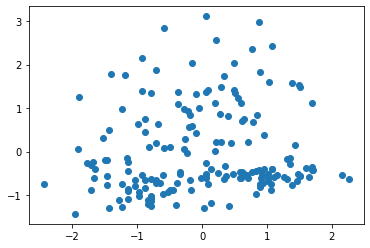

In [20]:
import matplotlib.pyplot as plt
plt.scatter(Y[:, 0], Y[:, 1]) # First two attributes only

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
# generate some random cluster data
X = load_wine().data
y = load_wine().target
rng = np.random.RandomState(74)

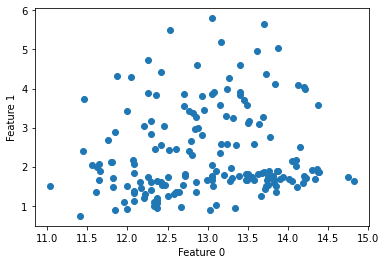

In [22]:
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

In [23]:
 hopkins(X,100) # sampling size 100

0.31255861826191617

In [24]:
1-hopkins(X,100) 

0.684014642376428

In [25]:
# transform the data to be stretched
transformation = rng.normal(size=(13, 13))
X = np.dot(X, transformation)

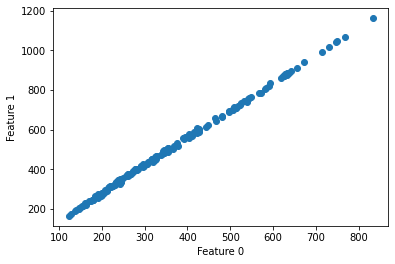

In [26]:
# plot
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

In [27]:
 hopkins(X,100)

0.03226678595905236

In [28]:
1-hopkins(X,100)

0.9728458707147553

# AGNES (Hierarchical)

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np

In [30]:
df = load_wine().data

In [31]:
from pyclustertend import hopkins

from sklearn.preprocessing import scale

In [32]:
Y = scale(df) # centered on mean and in std devn

In [33]:
hopkins(Y,5)

0.34201070382775656

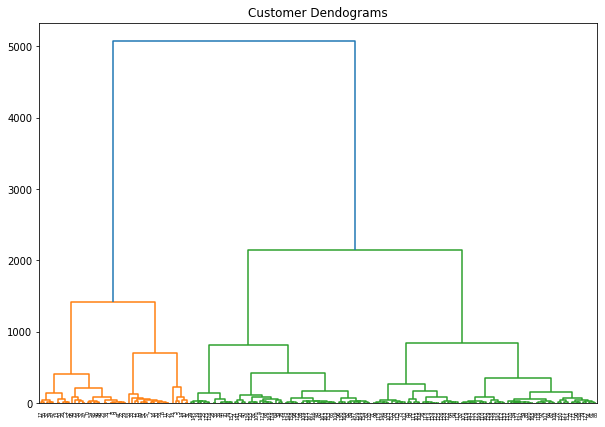

In [34]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(df, method='ward'))

N cluster value :  2


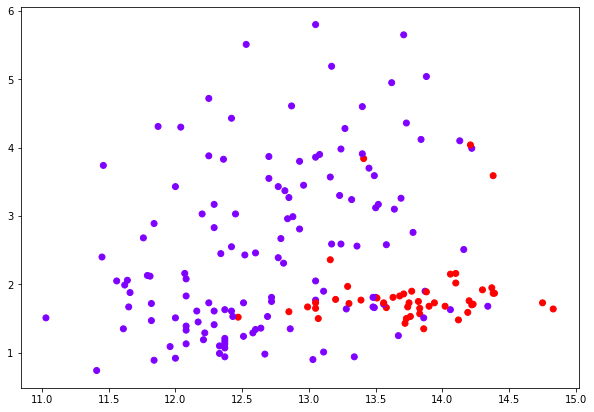

Silhouette Coefficient: 0.660493
N cluster value :  3


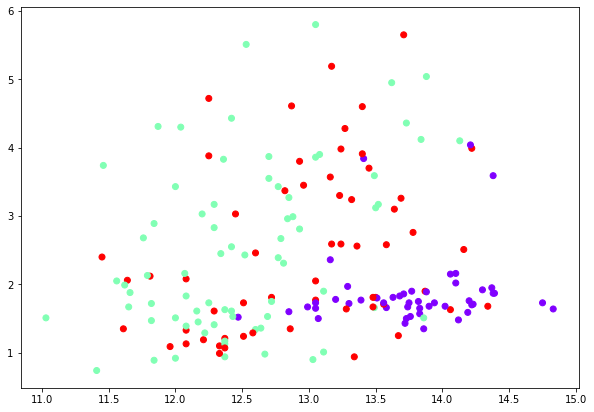

Silhouette Coefficient: 0.564596
N cluster value :  4


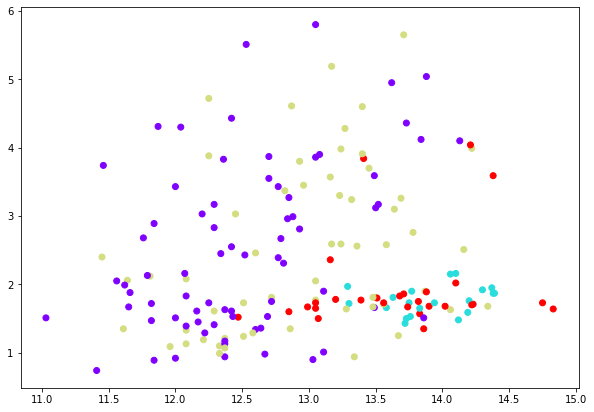

Silhouette Coefficient: 0.560440
N cluster value :  5


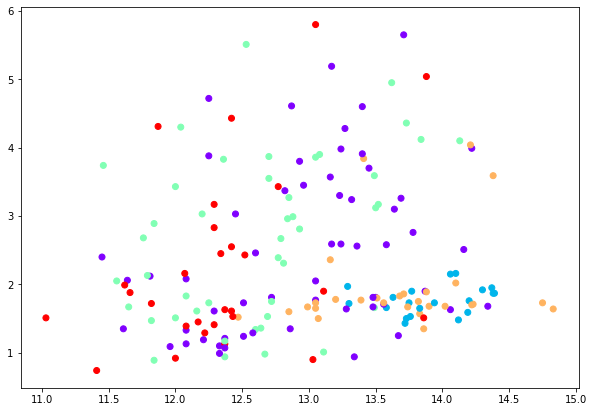

Silhouette Coefficient: 0.507048
N cluster value :  6


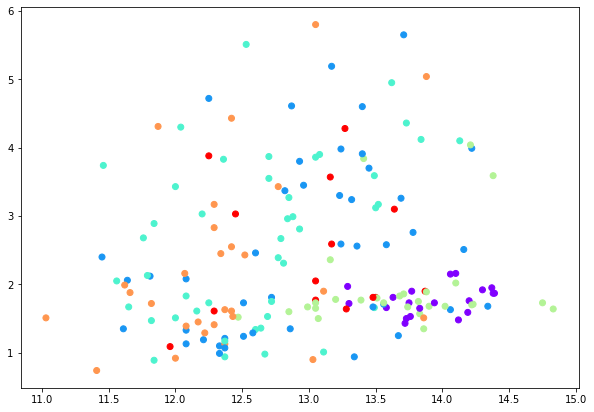

Silhouette Coefficient: 0.526933
N cluster value :  7


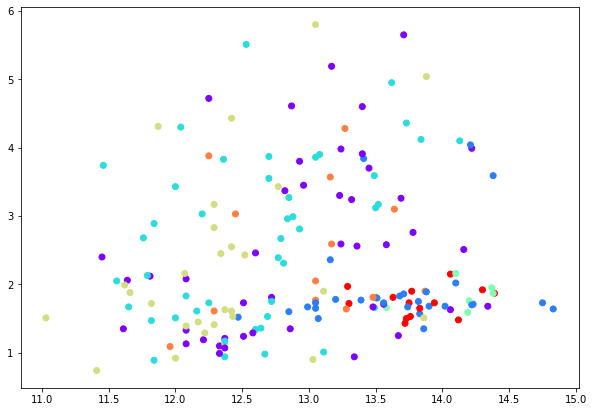

Silhouette Coefficient: 0.536360


In [35]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

for i in range(2,8):
    print('N cluster value : ',i)
    cluster = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')
    y_pred_ag = cluster.fit_predict(df)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(df[:,0], df[:,1], c=cluster.labels_, cmap='rainbow')
    plt.show()
    print("Silhouette Coefficient: %f" % metrics.silhouette_score(X, y_pred_ag))

- From the above SIlhouette Coefficient, we can say that the optimal number of clusters is 2 as its silhouette score is greater than that of other clusters

# K Means

In [36]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_wine
from sklearn import metrics

In [37]:
# Loading data
df = load_wine()
X = df.data
y = df.target

N cluster value :  2


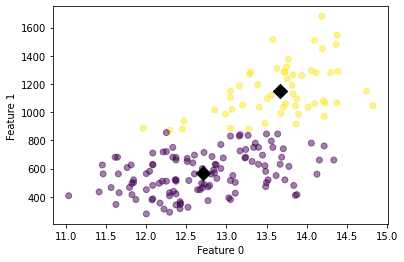


Silhouette Coefficient: 0.656854 

N cluster value :  3


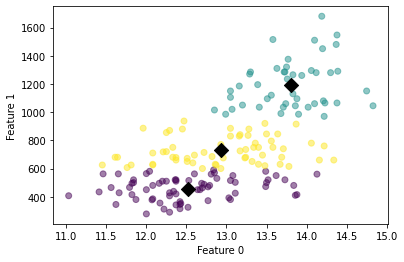


Silhouette Coefficient: 0.571138 

N cluster value :  4


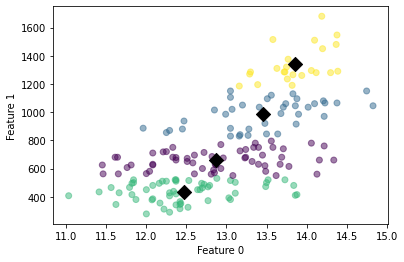


Silhouette Coefficient: 0.560594 

N cluster value :  5


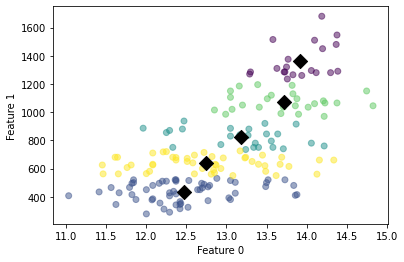


Silhouette Coefficient: 0.548999 

N cluster value :  6


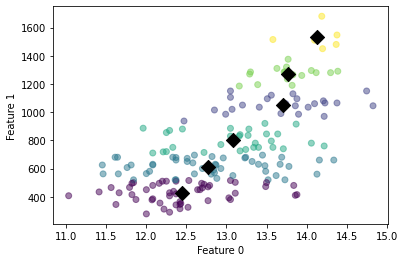


Silhouette Coefficient: 0.536978 

N cluster value :  7


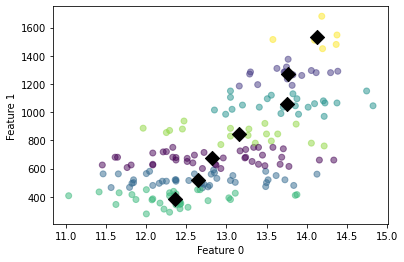


Silhouette Coefficient: 0.558379 



In [38]:
for i in range(2,8):
    print('N cluster value : ',i)
    model = KMeans(n_clusters=i)
    model.fit(X)
    labels = model.predict(X)
    centroids = model.cluster_centers_
    xs = X[:,0]
    ys = X[:,-1]

    plt.scatter(xs, ys, c=labels, alpha=0.5)
    plt.xlabel('Feature 0')
    plt.ylabel('Feature 1')

    plt.scatter(centroids[:,0], centroids[:,-1], marker='D', s=100, c='black')
    plt.show()
    
    print("\nSilhouette Coefficient: %f \n" % metrics.silhouette_score(X,labels ))

- From the above SIlhouette Coefficient, we can say that the optimal number of clusters is 2 as its silhouette score is greater than that of other clusters

# Dimensionality Reduction

In [39]:
import matplotlib.pylab as plt
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig
import numpy as np

In [40]:
from sklearn.datasets import load_wine
winedata = load_wine()
X, y = winedata['data'], winedata['target']

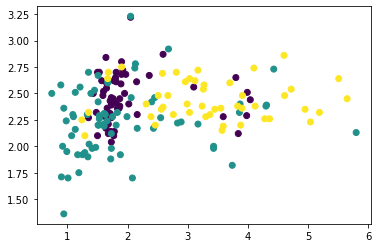

In [41]:
plt.scatter(X[:,1], X[:,2], c=y)
plt.show()

In [42]:
from sklearn.decomposition import PCA
pcs = PCA(n_components=2)
pcs.fit(X)

PCA(n_components=2)

In [43]:
pcsSummary = pd.DataFrame({"Standard deviation":np.sqrt(pcs.explained_variance_),"Proportion of variance": pcs.explained_variance_ratio_,
"Cumulative proportion": np.cumsum(pcs.explained_variance_ratio_)})

In [44]:
pcsSummary

,Standard deviation,Proportion of variance,Cumulative proportion
0,314.963156,0.998091,0.998091
1,13.135268,0.001736,0.999827


In [45]:
pcsSummary= pcsSummary.transpose()
pcsSummary

,0,1
Standard deviation,314.963156,13.135268
Proportion of variance,0.998091,0.001736
Cumulative proportion,0.998091,0.999827


In [46]:
pcsSummary.columns = ["PC1", "PC2"]
pcsSummary.columns

Index(['PC1', 'PC2'], dtype='object')

In [47]:
pcsSummary.round(4)

,PC1,PC2
Standard deviation,314.9632,13.1353
Proportion of variance,0.9981,0.0017
Cumulative proportion,0.9981,0.9998


In [48]:
print(pcs.explained_variance_ratio_)

[0.99809123 0.00173592]


# Convolutional Neural Network

In [102]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [103]:
#data_url = "http://lib.stat.cmu.edu/datasets/boston"
data = pd.read_csv("BostonHousing.csv")

In [104]:
data.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1


- CRIM: Per capita crime rate by town
- ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
- INDUS: Proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: Nitric oxide concentration (parts per 10 million)
- RM: Average number of rooms per dwelling
- AGE: Proportion of owner-occupied units built prior to 1940
- DIS: Weighted distances to five Boston employment centers
- RAD: Index of accessibility to radial highways
- TAX: Full-value property tax rate per $10,000

- PTRATIO: Pupil-teacher ratio by town
- LSTAT: Percentage of lower status of the population
- MEDV: Median value of owner-occupied homes in $1000s
- CAT. MEDV: Categorical Meedian Value




Classification using CNN

We will use our target 'CAT. MEDV' i.e (Categorical Median Value) for classification

In [105]:
x = data.drop(['CAT. MEDV','MEDV'],axis=1)    # Input 
y = data['CAT. MEDV']                         # Target
X = x.to_numpy()                              # Converting into numpy array
Y = y.to_numpy()

In [106]:
print(X.shape)                                # Checking input dimensions

(506, 12)


Reshaping of the input data x to create one-dimensional vectors from each row of input data.

In [107]:
X = X.reshape(X.shape[0],X.shape[1],1)        # Reshaping of input x
print(X.shape)                                # Checking the input dimension after reshaping

(506, 12, 1)


In [108]:
np.unique(Y)                                  # To check number of classes

array([0, 1])

In [109]:
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.15)
# Splitting the dataset into training and testing dataset

In [110]:
model = Sequential()                                                                          # Creates new model using Sequential API
model.add(Conv1D(64, 3, activation="relu",input_shape=(12,1)))                                # First Layer, input of size (12,1) , filter = 64 and kernel = 3
model.add(Dense(6,activation="relu"))                                                         # Adding dense Layer, with 6 units and activation of type rectified linear unit
model.add(Flatten())                                                                          # Converts into single dimensional array 
model.add(Dense(2,activation="softmax"))                                                      # Output Layer, with 3 units and activation of type softmax function
model.compile(loss = 'sparse_categorical_crossentropy',optimizer="adam",metrics=['accuracy']) # Compiles the model
model.summary()                         

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_5 (Conv1D)           (None, 10, 64)            256       
                                                                 
 dense_9 (Dense)             (None, 10, 6)             390       
                                                                 
 flatten_5 (Flatten)         (None, 60)                0         
                                                                 
 dense_10 (Dense)            (None, 2)                 122       
                                                                 
Total params: 768
Trainable params: 768
Non-trainable params: 0
_________________________________________________________________


In [111]:
model.fit(xtrain, ytrain, batch_size=16, epochs=100, verbose=0)
# Fit the model with training data
model.fit(xtest, ytest, batch_size=16, epochs=100, verbose=0)
# Fit the model with test data

In [112]:
acc_train = model.evaluate(xtrain, ytrain)
acc_test = model.evaluate(xtest,ytest)
print("Loss", acc_train[0], "Accuracy:", acc_train[1],"of training data")
print("Loss", acc_test[0], "Accuracy:", acc_test[1],"of test data")

3/3 [==============================] - 0s 3ms/step - loss: 0.0589 - accuracy: 0.9737
Loss 0.1828845888376236 Accuracy: 0.9255813956260681 of training data
Loss 0.058934543281793594 Accuracy: 0.9736841917037964 of test data


In [113]:
pred = model.predict(xtest)
pred_y = pred.argmax(axis=-1)
pred_y                        # Predicts the test data

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

In [114]:
conf_mat = confusion_matrix(ytest,pred_y)     # Checks the prediction accuracy with the help of confusion matrix
conf_mat

array([[61,  2],
       [ 0, 13]])

Regression Data with CNN

We will be using 'MEDV' as our target

In [62]:
x1 = data.drop(['CAT. MEDV','MEDV'],axis=1) # Input
y1 = data['MEDV']                           # Target
X1 = x1.to_numpy()                          # Converting it into numpy arrays
Y1 = y1.to_numpy()

In [63]:
print(X1.shape)

(506, 12)


Input has two dimension which has to be converted to obtain single input row

In [64]:
X1 = X1.reshape(X1.shape[0], X1.shape[1], 1)
print(X1.shape)

(506, 12, 1)


In [65]:
x_train, x_test, y_train, y_test=train_test_split(X1, Y1, test_size=0.15) 
# Splitting of dataset into training and testing data

In [66]:
model_reg = Sequential()                                                # Creating new model using Sequential API
model_reg.add(Conv1D(32, 3, activation="relu", input_shape=(12, 1)))    # First Layer, input of size (12,1) , filter = 32 and kernel = 3 
model_reg.add(Flatten())                                                # Converts into single dimensional array 
model_reg.add(Dense(1))                                                 # Output layer with 1 unit
model_reg.compile(loss="mse", optimizer="adam")                         # Compiles the model
model_reg.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 10, 32)            128       
                                                                 
 flatten_1 (Flatten)         (None, 320)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 321       
                                                                 
Total params: 449
Trainable params: 449
Non-trainable params: 0
_________________________________________________________________


In [67]:
model_reg.fit(x_train,y_train, batch_size=16,epochs=100,verbose=0)
# Fit the model using training dataset

In [68]:
ypred = model_reg.predict(x_test)
ypred # Predict the values for test dataset

array([[15.802612 ],
       [28.003832 ],
       [25.224794 ],
       [20.61687  ],
       [20.253633 ],
       [21.258669 ],
       [15.557102 ],
       [14.893753 ],
       [17.476624 ],
       [22.5516   ],
       [ 7.595999 ],
       [25.18232  ],
       [28.346088 ],
       [22.88289  ],
       [20.590746 ],
       [23.754614 ],
       [ 8.958052 ],
       [18.178743 ],
       [28.142845 ],
       [20.455973 ],
       [11.572073 ],
       [ 6.9920826],
       [27.737913 ],
       [20.630621 ],
       [15.614721 ],
       [21.238451 ],
       [29.775122 ],
       [25.176836 ],
       [20.52343  ],
       [15.411543 ],
       [21.550673 ],
       [16.969425 ],
       [33.998783 ],
       [24.71884  ],
       [10.32081  ],
       [38.25803  ],
       [22.430914 ],
       [17.286772 ],
       [33.69532  ],
       [21.848373 ],
       [25.887938 ],
       [16.22806  ],
       [21.189486 ],
       [25.116526 ],
       [29.98303  ],
       [17.696796 ],
       [11.562254 ],
       [18.11

In [69]:
print(model_reg.evaluate(x_train, y_train)) # Evaluate the training data

14/14 [==============================] - 0s 4ms/step - loss: 22.8738
22.87375259399414


In [70]:
print("MSE: %.4f" % mean_squared_error(y_test, ypred)) # Calculate mean squared error

MSE: 21.5936


# Cross Validation of Classification model

Cross validation is the method of re-sampling method that uses different portions of the data to test and train a model on different iterations.

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size=0.2, random_state=428)

In [72]:
# Training all the classification model with target 'CAT. MEDV'

model_log = LogisticRegression().fit(Xtrain,Ytrain)
model_dec_cal = DecisionTreeClassifier(criterion = 'entropy').fit(Xtrain,Ytrain)
model_dec_reg = DecisionTreeRegressor(max_depth=5).fit(Xtrain,Ytrain)
model_nb = GaussianNB().fit(Xtrain,Ytrain)
model_lda = LinearDiscriminantAnalysis().fit(Xtrain,Ytrain)
model_svm = svm.SVC(kernel='linear').fit(Xtrain,Ytrain)
model_knn = KNeighborsClassifier(n_neighbors=5).fit(Xtrain,Ytrain)

/Users/abirami/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Cross validation using stratified sampling will ensure same proportion of data across.

In [73]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)          # Number of folds is 10 and it is repeated for 3 times.

print("Classification models")
model = [model_log,model_dec_cal,model_nb,model_lda,model_svm,model_knn]
for i in model:
    scores = cross_val_score(i, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
    print("Cross validation scores for ",i," is ",np.mean(scores))

Classification models
Cross validation scores for  LogisticRegression()  is  0.9374771241830065
Cross validation scores for  DecisionTreeClassifier(criterion='entropy')  is  0.9473071895424837
Cross validation scores for  GaussianNB()  is  0.7905751633986928
Cross validation scores for  LinearDiscriminantAnalysis()  is  0.9321437908496732
Cross validation scores for  SVC(kernel='linear')  is  0.9493333333333336
Cross validation scores for  KNeighborsClassifier()  is  0.8893856209150325


# GridSearchCV

In [74]:
param_dict = {
    "criterion" : ['gini','entropy'],
    "max_depth" : range(1,10),
    "min_samples_split":range(1,10),
    "min_samples_leaf":range(1,5)
}

In [75]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
print("GridSearchCV for Decision Tree Classifier")
grid = GridSearchCV(model_dec_cal, param_grid = param_dict, cv=10,verbose=1, n_jobs=-1)
grid.fit(Xtrain,Ytrain)
print("Best params for Decision Tree Classifier is ",grid.best_params_)
print("Best Estimator for Decision Tree Classifier is ",grid.best_estimator_)
print("Best Score for Decision Tree Classifier is ",grid.best_score_)

GridSearchCV for Decision Tree Classifier
Fitting 10 folds for each of 648 candidates, totalling 6480 fits
Best params for Decision Tree Classifier is  {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Estimator for Decision Tree Classifier is  DecisionTreeClassifier(max_depth=9)
Best Score for Decision Tree Classifier is  0.9627439024390243


In [76]:
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

In [77]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
print("GridSearchCV for Logistic Regression")
grid = GridSearchCV(model_log,param_grid = parameters,scoring='accuracy',cv=10)
grid.fit(Xtrain,Ytrain)
print("Best params for Logistic Regreesion is ",grid.best_params_)
print("Best Estimator for Logistic Regreesion is ",grid.best_estimator_)
print("Best Score for Logistic Regreesion is ",grid.best_score_)

GridSearchCV for Logistic Regression
Best params for Logistic Regreesion is  {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}
Best Estimator for Logistic Regreesion is  LogisticRegression(penalty='l1', solver='liblinear')
Best Score for Logistic Regreesion is  0.9501829268292683


In [78]:
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7],
           "min_samples_leaf":[1,2,3,4,5],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50] }

In [79]:
tuning_model=GridSearchCV(model_dec_reg,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)
tuning_model.fit(Xtrain,Ytrain)
print("Best params for Decision Tree Regressor is ",tuning_model.best_params_)
print("Best Estimator for Decision Tree Regressor is ",tuning_model.best_estimator_)
print("Best Score for Decision Tree Regressor is ",tuning_model.best_score_)

Fitting 3 folds for each of 4800 candidates, totalling 14400 fits
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.050 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.091 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.056 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.099 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.112 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf

[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.113 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.121 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.105 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] E

[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.109 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.098 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.132 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.114 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.111 total time=   0.0s
[CV 2/3] E

[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.084 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.091 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.115 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.117 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.087 total time=   0.0s
[CV 2/3] END max_depth

[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.086 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.050 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.074 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.068 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.098 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.139 total time=   0.0s
[CV 3/3] END max_depth

[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.101 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.087 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.109 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.050 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.074 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.068 total time=   0.0s
[CV 1/3] END max_depth

[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.050 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.091 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.056 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.091 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth

[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.105 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth

[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.050 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.091 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.056 total time=   0.0s
[CV 1/3] END max_depth

[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.129 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.105 total time=   0.0s
[CV 1/3] END max_depth

[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.110 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth

[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.085 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.139 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.116 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.087 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.109 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.098 total time=   0.0s
[CV 1/3] END max_depth

[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.109 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.098 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.102 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.132 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.115 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth

[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.093 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.063 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.084 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.091 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.102 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth

[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.068 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.102 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.124 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.108 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.063 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.084 total time=   0.0s
[CV 3/3] END max_depth

[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.107 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.138 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.103 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.124 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.105 total time=   0.0s
[CV 1/3] E

[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.105 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] E

[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.111 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.131 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.099 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.113 total time=   0.0s
[CV 3/3] E

[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.084 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.108 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.101 total time=   0.0s
[CV 3/3] END max_depth

[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.131 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.094 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.132 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.117 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.109 total time=   0.0s
[CV 2/3] END max_depth

[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.106 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.094 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.074 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.094 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.109 total time=   0.1s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.134 total time=   0.0s
[CV 3/3] END max_depth

[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.134 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.125 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.094 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.099 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.111 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.092 total time=   0.0s
[CV 2/3] END max_depth

[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.050 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.138 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.118 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.132 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.108 total time=   0.0s
[CV 1/3] END max_depth

[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.109 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.128 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.103 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.110 total time=   0.0s
[CV 1/3] END max_depth

[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.121 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth

[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.076 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.109 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.098 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.110 total time=   0.0s
[CV 2/3] END max_depth

[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.127 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.103 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.087 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.109 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.098 total time=   0.0s
[CV 1/3] END max_depth

[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.113 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.101 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.098 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.112 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth

[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.134 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.113 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.084 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.122 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.112 total time=   0.0s
[CV 2/3] END max_depth

[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.114 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.122 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.093 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.110 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.084 total time=   0.0s
[CV 1/3] END max_depth

[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.077 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.109 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.130 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.103 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.136 total time=   0.0s
[CV 3/3] END max_depth

[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.109 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.091 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.105 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.108 total time=   0.0s
[CV 2/3] END m

[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.112 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.121 total time=   0.0s
[CV 1/3] E

[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.109 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.098 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.107 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.133 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.111 total time=   0.0s
[CV 2/3] E

[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.084 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.094 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.108 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.136 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.117 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.076 total time=   0.0s
[CV 2/3] END max_depth

[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.099 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.094 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.093 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.076 total time=   0.0s
[CV 2/3] END max_depth

[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.111 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.107 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.063 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.110 total time=   0.0s
[CV 3/3] END max_depth

[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.109 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.091 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.075 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.100 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.120 total time=   0.0s
[CV 1/3] END max_depth

[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.104 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.124 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth

[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.101 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.111 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.113 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth

[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.117 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.063 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.113 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.111 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.105 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth

[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.084 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.114 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.076 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.129 total time=   0.0s
[CV 3/3] END max_depth

[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.074 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.068 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.093 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.134 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.127 total time=   0.1s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.092 total time=   0.0s
[CV 2/3] END max_depth

[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.101 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.125 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.075 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.116 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth

[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.124 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth

[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.121 total time=   0.0s
[CV 1/3] END max_depth

[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.087 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.121 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.098 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.107 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth

[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.121 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.109 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.099 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.111 total time=   0.0s
[CV 1/3] END max_depth

[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.127 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.099 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.050 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.074 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.068 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.106 total time=   0.0s
[CV 2/3] E

[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.091 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.056 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.071 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.094 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.110 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.050 total time=   0.0s
[CV 2/3] E

[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.112 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.105 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] E

[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.113 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.110 total time=   0.0s
[CV 1/3] END max_depth

[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.063 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.084 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.091 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.089 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.131 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.111 total time=   0.0s
[CV 1/3] END max_depth

[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.074 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.068 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.098 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.135 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.104 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.063 total time=   0.0s
[CV 2/3] END max_depth

[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.050 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.091 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.056 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.105 total time=   0.0s
[CV 2/3] END max_depth

[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.110 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth

[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.116 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.087 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.109 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.098 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.093 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.104 total time=   0.0s
[CV 3/3] END max_depth

[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.063 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.084 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.091 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.103 total time=   0.0s
[CV 1/3] END max_depth

[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.110 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.110 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.109 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.063 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.084 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.091 total time=   0.0s
[CV 1/3] END max_depth

[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.087 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.109 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.098 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.125 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.112 total time=   0.0s
[CV 1/3] END max_depth

[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.091 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.056 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.054 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.090 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.060 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.050 total time=   0.0s
[CV 2/3] END max_depth

[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.120 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.063 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.084 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.091 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.108 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.122 total time=   0.0s
[CV 3/3] END max_depth

[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.087 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.109 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.098 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.106 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.132 total time=   0.0s
[CV 3/3] END max_depth

[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.114 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.110 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] E

[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.103 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.087 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.109 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.098 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.108 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.132 total time=   0.0s
[CV 3/3] E

[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.051 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.069 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.045 total time=   0.0s
[CV 1/3] END max

[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.135 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.086 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.063 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.084 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.091 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.105 total time=   0.0s
[CV 2/3] END max_depth

[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.133 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.105 total time=   0.0s
[CV 1/3] END max_depth

[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.051 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.070 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.045 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.080 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.083 total time=   0.0s
[CV 3/3] END max_depth

[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.114 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.077 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.051 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.073 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.069 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.085 total time=   0.0s
[CV 2/3] END max_depth

[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.108 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.125 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.096 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.087 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.109 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.098 total time=   0.0s
[CV 1/3] END max_depth

[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.051 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.069 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.045 total time=   0.0s
[CV 1/3] END max_depth

[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.105 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.051 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.069 total time=   0.0s
[CV 3/3] END max_depth

[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.051 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.069 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.045 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.066 total time=   0.0s
[CV 2/3] END max_depth

[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.051 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.069 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.045 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.086 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.076 total time=   0.0s
[CV 3/3] END max_depth

[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.051 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.069 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.045 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.053 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.105 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.086 total time=   0.0s
[CV 1/3] END max_depth

[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.093 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.042 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.051 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.072 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.069 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.096 total time=   0.0s
[CV 2/3] END max_depth

[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.105 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.127 total time=   0.1s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.091 total time=   0.0s
[CV 2/3] E

[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.129 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.099 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.101 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.120 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] E

[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.105 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.050 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.114 total time=   0.0s
[CV 3/3] END m

[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.048 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.109 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.083 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.087 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.115 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.085 total time=   0.0s
[CV 1/3] END max_depth

[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.102 total time=   0.1s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.133 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.105 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.091 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.058 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.111 total time=   0.0s
[CV 1/3] END max_depth

[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.109 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.109 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.101 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.114 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth

[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.112 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.129 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.097 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.107 total time=   0.0s
[CV 2/3] END max_depth

[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.110 total time=   0.0s
[CV 1/3] END max_depth

[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.096 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.046 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.100 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.092 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.092 total time=   0.0s
[CV 2/3] END max_depth

[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.113 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.094 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.122 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.109 total time=   0.0s
[CV 2/3] END max_depth

[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.105 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth

[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.095 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.075 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.096 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.098 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.088 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.086 total time=   0.0s
[CV 2/3] END max_depth

[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.126 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.076 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.129 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.100 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth

[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.100 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.103 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth

[CV 2/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.110 total time=   0.1s
[CV 1/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.089 total time=   0.0s
[CV 2/3] E

[CV 2/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.068 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.097 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.082 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.038 total time=   0.0s
[CV 2/3] E

[CV 1/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.093 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.085 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.063 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.134 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.091 total time=   0.0s
[CV 1/3] END max_depth

[CV 3/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.124 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.079 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.078 total time=   0.0s
[CV 3/3] END max_depth

[CV 3/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.060 total time=   0.1s
[CV 1/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.090 total time=   0.1s
[CV 2/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.121 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.120 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.105 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.073 total time=   0.0s
[CV 3/3] END max_depth

[CV 2/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.116 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.092 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.110 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.094 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth

[CV 2/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.118 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.107 total time=   0.0s
[CV 2/3] END max_depth

[CV 1/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.116 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.132 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.111 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth

[CV 3/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.114 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth

[CV 1/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.067 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.104 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.046 total time=   0.0s
[CV 1/3] END max_depth

[CV 1/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.110 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.125 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.091 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.092 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.109 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.084 total time=   0.0s
[CV 1/3] END max_depth

[CV 1/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.094 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.069 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.062 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.128 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.088 total time=   0.0s
[CV 1/3] END max_depth

[CV 3/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.121 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.109 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.100 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.106 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.115 total time=   0.0s
[CV 3/3] END max_depth

[CV 2/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.118 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth

[CV 1/3] END max_depth=3, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.093 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.082 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.081 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.051 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.073 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.069 total time=   0.0s
[CV 1/3] E

[CV 1/3] END max_depth=3, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.083 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.118 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.116 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.087 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.109 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.098 total time=   0.0s
[CV 1/3] E

[CV 3/3] END max_depth=3, max_features=None, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.098 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=None, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.105 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=None, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=None, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=None, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=None, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth

[CV 2/3] END max_depth=3, max_features=None, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=None, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.051 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.070 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.045 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.051 total time=   0.0s
[CV 2/3] END max_depth

[CV 1/3] END max_depth=3, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=None, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.051 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=None, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.069 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=None, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.045 total time=   0.0s
[CV 1/3] END max_depth

[CV 1/3] END max_depth=3, max_features=None, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.113 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=None, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=None, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.105 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=None, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=None, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=None, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.110 total time=   0.0s
[CV 1/3] END max_depth

[CV 1/3] END max_depth=3, max_features=None, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.107 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=None, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.129 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=None, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.107 total time=   0.1s
[CV 1/3] END max_depth=3, max_features=None, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=None, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=None, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.105 total time=   0.0s
[CV 1/3] END max_depth

[CV 3/3] END max_depth=3, max_features=None, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.122 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=None, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.087 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=None, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.109 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=None, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.098 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=None, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.113 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=None, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.113 total time=   0.0s
[CV 3/3] END max_depth

[CV 1/3] END max_depth=3, max_features=None, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.087 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=None, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.109 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=None, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.098 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=None, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=None, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.120 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=None, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.122 total time=   0.0s
[CV 1/3] END max_depth

[CV 3/3] END max_depth=3, max_features=None, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=None, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=None, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=None, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.105 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=None, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=None, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth

[CV 2/3] END max_depth=3, max_features=None, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.073 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=None, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.069 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=None, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.097 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=None, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.138 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=None, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.089 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=None, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.063 total time=   0.0s
[CV 2/3] END max_depth

[CV 1/3] END max_depth=3, max_features=None, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=None, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=None, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.105 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=None, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=None, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=None, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth

[CV 3/3] END max_depth=3, max_features=None, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.110 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=None, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=None, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=None, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=None, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.051 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=None, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.069 total time=   0.0s
[CV 3/3] END max_depth

[CV 1/3] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.051 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.070 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.045 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.089 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.082 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.043 total time=   0.0s
[CV 1/3] E

[CV 3/3] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.045 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.051 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.072 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.087 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.051 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.073 total time=   0.0s
[CV 3/3] E

[CV 2/3] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.070 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.045 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.097 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.115 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.082 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.051 total time=   0.0s
[CV 2/3] E

[CV 2/3] END max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.110 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.051 total time=   0.0s
[CV 2/3] END max_depth

[CV 2/3] END max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.072 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.099 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.051 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.072 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.069 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.083 total time=   0.0s
[CV 2/3] END max_depth

[CV 2/3] END max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.101 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.103 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.063 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.084 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.091 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.080 total time=   0.0s
[CV 2/3] END max_depth

[CV 3/3] END max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.102 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.110 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth

[CV 3/3] END max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.051 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.070 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.045 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.089 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.122 total time=   0.0s
[CV 3/3] END max_depth

[CV 1/3] END max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.058 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.085 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.086 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.051 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.073 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.069 total time=   0.0s
[CV 1/3] END max_depth

[CV 1/3] END max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.109 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.118 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.087 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.109 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.098 total time=   0.0s
[CV 1/3] END max_depth

[CV 1/3] END max_depth=5, max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.121 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.051 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.069 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.045 total time=   0.0s
[CV 1/3] END max_depth

[CV 3/3] END max_depth=5, max_features=auto, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.110 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.051 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.069 total time=   0.0s
[CV 3/3] END max_depth

[CV 2/3] END max_depth=5, max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.091 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.112 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.063 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.084 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.091 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.097 total time=   0.0s
[CV 2/3] END max_depth

[CV 2/3] END max_depth=5, max_features=auto, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.105 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.110 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth

[CV 3/3] END max_depth=5, max_features=log2, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.092 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=log2, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.081 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=log2, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.132 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=log2, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.116 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=log2, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.051 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=log2, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.110 total time=   0.0s
[CV 3/3] E

[CV 2/3] END max_depth=5, max_features=log2, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=log2, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.121 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=log2, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=log2, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=log2, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.124 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=log2, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] E

[CV 1/3] END max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.095 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.096 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.078 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.051 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.099 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.092 total time=   0.0s
[CV 1/3] END max_depth

[CV 2/3] END max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.084 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.071 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.083 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.094 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.092 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.096 total time=   0.0s
[CV 2/3] END max_depth

[CV 2/3] END max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.096 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.049 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.088 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.134 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.106 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.091 total time=   0.0s
[CV 2/3] END max_depth

[CV 3/3] END max_depth=5, max_features=log2, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.102 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=log2, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.096 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=log2, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.082 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=log2, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.095 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=log2, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.093 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=log2, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.115 total time=   0.0s
[CV 3/3] END max_depth

[CV 2/3] END max_depth=5, max_features=log2, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.099 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=log2, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.091 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=log2, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=log2, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=log2, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=log2, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.099 total time=   0.0s
[CV 2/3] END max_depth

[CV 1/3] END max_depth=5, max_features=log2, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=log2, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=log2, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.124 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=log2, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=log2, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=log2, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth

[CV 2/3] END max_depth=5, max_features=log2, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=log2, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.104 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=log2, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=log2, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=log2, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.121 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=log2, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth

[CV 1/3] END max_depth=5, max_features=log2, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.076 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=log2, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.113 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=log2, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.098 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=log2, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.106 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=log2, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=log2, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth

[CV 1/3] END max_depth=5, max_features=log2, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.063 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=log2, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.109 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=log2, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.084 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=log2, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=log2, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=log2, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.114 total time=   0.0s
[CV 1/3] END max_depth

[CV 1/3] END max_depth=5, max_features=log2, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=log2, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=log2, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.118 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=log2, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=log2, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=log2, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth

[CV 2/3] END max_depth=5, max_features=log2, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.125 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=log2, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.114 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=log2, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.099 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=log2, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.106 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=log2, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.069 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=log2, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth

[CV 2/3] END max_depth=5, max_features=log2, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.076 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=log2, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.046 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=log2, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.095 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=log2, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.124 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=log2, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.090 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=log2, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.087 total time=   0.0s
[CV 2/3] END max_depth

[CV 2/3] END max_depth=5, max_features=log2, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=log2, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.124 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=log2, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=log2, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=log2, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.048 total time=   0.0s
[CV 2/3] END max_dep

[CV 2/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.124 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.070 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.115 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.132 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.117 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.092 total time=   0.0s
[CV 2/3] E

[CV 3/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.120 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.137 total time=   0.0s
[CV 3/3] E

[CV 2/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.116 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.113 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.097 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.117 total time=   0.0s
[CV 2/3] END max_depth

[CV 2/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.124 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.112 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.105 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.132 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.093 total time=   0.0s
[CV 2/3] END max_depth

[CV 1/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.105 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.113 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.133 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.098 total time=   0.0s
[CV 1/3] END max_depth

[CV 1/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.106 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.128 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.091 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.110 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.091 total time=   0.0s
[CV 1/3] END max_depth

[CV 1/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.084 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.127 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.113 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.100 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.091 total time=   0.0s
[CV 1/3] END max_depth

[CV 3/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.121 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.087 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.101 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.120 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth

[CV 3/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.074 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.113 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.134 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.106 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.051 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.060 total time=   0.0s
[CV 3/3] END max_depth

[CV 2/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.076 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.109 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.098 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth

[CV 1/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.078 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.102 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.062 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.103 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.125 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth

[CV 1/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.117 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.110 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.084 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.124 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.096 total time=   0.0s
[CV 1/3] END max_depth

[CV 3/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.110 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.058 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.096 total time=   0.0s
[CV 3/3] END max_depth

[CV 3/3] END max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.087 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.109 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.098 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.106 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] E

[CV 1/3] END max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.087 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.109 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.098 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.107 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.112 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.124 total time=   0.0s
[CV 1/3] E

[CV 2/3] END max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.105 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.051 total time=   0.0s
[CV 2/3] END

[CV 3/3] END max_depth=5, max_features=None, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.115 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=None, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.087 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=None, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.109 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=None, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.098 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=None, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.109 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=None, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.116 total time=   0.0s
[CV 3/3] END max_depth

[CV 2/3] END max_depth=5, max_features=None, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=None, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.051 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.070 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.045 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.083 total time=   0.0s
[CV 2/3] END max_depth

[CV 2/3] END max_depth=5, max_features=None, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.086 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=None, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.119 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=None, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.063 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=None, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.084 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=None, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.091 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=None, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.107 total time=   0.0s
[CV 2/3] END max_depth

[CV 3/3] END max_depth=5, max_features=None, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.109 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=None, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=None, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=None, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.105 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=None, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=None, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth

[CV 1/3] END max_depth=5, max_features=None, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.051 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=None, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.073 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=None, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.069 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=None, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.051 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=None, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.129 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=None, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.110 total time=   0.0s
[CV 1/3] END max_depth

[CV 3/3] END max_depth=5, max_features=None, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.106 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=None, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=None, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=None, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.105 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=None, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=None, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth

[CV 3/3] END max_depth=5, max_features=None, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.069 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=None, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.098 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=None, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.115 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=None, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.094 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=None, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.063 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=None, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.084 total time=   0.0s
[CV 3/3] END max_depth

[CV 3/3] END max_depth=5, max_features=None, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=None, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.051 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=None, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.069 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=None, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.045 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=None, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.082 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=None, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.106 total time=   0.0s
[CV 3/3] END max_depth

[CV 1/3] END max_depth=5, max_features=None, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.051 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=None, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.072 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=None, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.069 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=None, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.092 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=None, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.094 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=None, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.113 total time=   0.0s
[CV 1/3] END max_depth

[CV 3/3] END max_depth=5, max_features=None, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.069 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=None, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.113 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=None, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.114 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=None, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.102 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=None, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.063 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=None, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.084 total time=   0.0s
[CV 3/3] END max_depth

[CV 2/3] END max_depth=5, max_features=None, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.073 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=None, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.069 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=None, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.110 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=None, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.110 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=None, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.097 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=None, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.063 total time=   0.0s
[CV 2/3] END max_depth

[CV 1/3] END max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.115 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.138 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.105 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.063 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.084 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.091 total time=   0.0s
[CV 1/3] E

[CV 2/3] END max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.051 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.069 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.045 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.087 total time=   0.0s
[CV 2/3] END max_d

[CV 2/3] END max_depth=7, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.069 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.045 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.095 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.076 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.085 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.051 total time=   0.0s
[CV 2/3] END max_depth

[CV 3/3] END max_depth=7, max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.051 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.070 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.045 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.072 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.108 total time=   0.0s
[CV 3/3] END max_depth

[CV 2/3] END max_depth=7, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.051 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.069 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.045 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.067 total time=   0.0s
[CV 2/3] END max_depth

[CV 2/3] END max_depth=7, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.109 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.098 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.114 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.109 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth

[CV 3/3] END max_depth=7, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.098 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.130 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.109 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth

[CV 1/3] END max_depth=7, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.051 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.069 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.045 total time=   0.0s
[CV 1/3] END max_depth

[CV 1/3] END max_depth=7, max_features=auto, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=auto, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=auto, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.110 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=auto, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=auto, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=auto, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth

[CV 1/3] END max_depth=7, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.105 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.133 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.087 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.109 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.098 total time=   0.0s
[CV 1/3] END max_depth

[CV 1/3] END max_depth=7, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.109 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.121 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.105 total time=   0.0s
[CV 1/3] END max_depth

[CV 3/3] END max_depth=7, max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.091 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.114 total time=   0.1s
[CV 2/3] END max_depth=7, max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.117 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.087 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.109 total time=   0.0s
[CV 3/3] END max_depth

[CV 3/3] END max_depth=7, max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.091 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.051 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.072 total time=   0.1s
[CV 3/3] END max_depth=7, max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.069 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.095 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.134 total time=   0.0s
[CV 3/3] END max_depth

[CV 1/3] END max_depth=7, max_features=auto, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.092 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=auto, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.112 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=auto, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.094 total time=   0.1s
[CV 1/3] END max_depth=7, max_features=auto, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.063 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=auto, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.084 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=auto, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.091 total time=   0.0s
[CV 1/3] END max_depth

[CV 2/3] END max_depth=7, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.084 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.091 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.111 total time=   0.1s
[CV 2/3] END max_depth=7, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.109 total time=   0.0s
[CV 2/3] E

[CV 2/3] END max_depth=7, max_features=log2, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=log2, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.114 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=log2, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=log2, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=log2, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.124 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=log2, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] E

[CV 1/3] END max_depth=7, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.120 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.122 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.108 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.113 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.098 total time=   0.0s
[CV 1/3] E

[CV 1/3] END max_depth=7, max_features=log2, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=log2, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.118 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=log2, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.103 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=log2, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.099 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=log2, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.113 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=log2, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.122 total time=   0.0s
[CV 1/3] END max_depth

[CV 3/3] END max_depth=7, max_features=log2, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=log2, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=log2, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=log2, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.118 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=log2, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=log2, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth

[CV 2/3] END max_depth=7, max_features=log2, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=log2, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.105 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=log2, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=log2, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=log2, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=log2, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.085 total time=   0.0s
[CV 2/3] END max_depth

[CV 2/3] END max_depth=7, max_features=log2, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.117 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=log2, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.046 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=log2, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.116 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=log2, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.098 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=log2, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.090 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=log2, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.108 total time=   0.0s
[CV 2/3] END max_depth

[CV 1/3] END max_depth=7, max_features=log2, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.095 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=log2, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.085 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=log2, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.088 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=log2, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.051 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=log2, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.119 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=log2, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.069 total time=   0.0s
[CV 1/3] END max_depth

[CV 3/3] END max_depth=7, max_features=log2, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.084 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=log2, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.104 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=log2, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.103 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=log2, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.099 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=log2, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.108 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=log2, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.109 total time=   0.0s
[CV 3/3] END max_depth

[CV 2/3] END max_depth=7, max_features=log2, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=log2, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.110 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=log2, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=log2, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=log2, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=log2, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.074 total time=   0.0s
[CV 2/3] END max_depth

[CV 1/3] END max_depth=7, max_features=log2, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=log2, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=log2, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=log2, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.053 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=log2, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.093 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=log2, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.076 total time=   0.0s
[CV 1/3] END max_depth

[CV 1/3] END max_depth=7, max_features=log2, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.081 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=log2, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.100 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=log2, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.071 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=log2, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.106 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=log2, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.120 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=log2, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.116 total time=   0.0s
[CV 1/3] END max_depth

[CV 2/3] END max_depth=7, max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=log2, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.062 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=log2, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.085 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=log2, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.068 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=log2, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.101 total time=   0.0s
[CV 2/3] END max_depth

[CV 2/3] END max_depth=7, max_features=log2, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.118 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=log2, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=log2, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=log2, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.137 total time=   0.1s
[CV 3/3] END max_depth=7, max_features=log2, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.118 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=log2, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth

[CV 1/3] END max_depth=7, max_features=log2, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=log2, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=log2, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.042 total time=   0.1s
[CV 2/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.090 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.099 total time=   0.0s
[CV 1/3] END max

[CV 3/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.118 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.049 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.078 total time=   0.0s
[CV 3/3] E

[CV 3/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.118 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.056 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.099 total time=   0.0s
[CV 3/3] E

[CV 2/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.117 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.101 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.108 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.109 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.097 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth

[CV 2/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.121 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.041 total time=   0.0s
[CV 2/3] END max_depth

[CV 1/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.113 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.137 total time=   0.1s
[CV 3/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.121 total time=   0.0s
[CV 1/3] END max_depth

[CV 1/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth

[CV 3/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.051 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.069 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.046 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.106 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.133 total time=   0.1s
[CV 3/3] END max_depth

[CV 2/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.074 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.112 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.088 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.131 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.116 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.092 total time=   0.0s
[CV 2/3] END max_depth

[CV 1/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.076 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.129 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.097 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth

[CV 1/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.111 total time=   0.1s
[CV 2/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.133 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.118 total time=   0.0s
[CV 1/3] END max_depth

[CV 2/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.046 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.101 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.051 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.106 total time=   0.0s
[CV 2/3] END max_depth

[CV 1/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.063 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.113 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.091 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.127 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth

[CV 2/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.124 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.049 total time=   0.0s
[CV 2/3] END max_depth

[CV 3/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.051 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.070 total time=   0.0s
[CV 3/3] END max_d

[CV 2/3] END max_depth=7, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.070 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.045 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.078 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.059 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.049 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.051 total time=   0.0s
[CV 2/3] E

[CV 3/3] END max_depth=7, max_features=None, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.051 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.070 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.045 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.086 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.111 total time=   0.0s
[CV 3/3] E

[CV 3/3] END max_depth=7, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.105 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=None, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.051 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=None, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.069 total time=   0.0s
[CV 3/3] END max_depth

[CV 1/3] END max_depth=7, max_features=None, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.051 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=None, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.072 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=None, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.069 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=None, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.092 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=None, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.092 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=None, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.114 total time=   0.0s
[CV 1/3] END max_depth

[CV 1/3] END max_depth=7, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.063 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.084 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.091 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.108 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.131 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.110 total time=   0.0s
[CV 1/3] END max_depth

[CV 2/3] END max_depth=7, max_features=None, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.084 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=None, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.091 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=None, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.116 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=None, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.128 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=None, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.101 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=None, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.087 total time=   0.0s
[CV 2/3] END max_depth

[CV 3/3] END max_depth=7, max_features=None, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.071 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=None, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.051 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=None, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.073 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=None, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.069 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=None, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.095 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=None, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.098 total time=   0.0s
[CV 3/3] END max_depth

[CV 2/3] END max_depth=7, max_features=None, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.073 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=None, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.069 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=None, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.088 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=None, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.100 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=None, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.105 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=None, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.063 total time=   0.0s
[CV 2/3] END max_depth

[CV 1/3] END max_depth=7, max_features=None, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.096 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=None, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.120 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=None, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.121 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=None, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.087 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=None, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.109 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=None, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.098 total time=   0.0s
[CV 1/3] END max_depth

[CV 3/3] END max_depth=7, max_features=None, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.091 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=None, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.088 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=None, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.125 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=None, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=None, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.087 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=None, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.109 total time=   0.0s
[CV 3/3] END max_depth

[CV 3/3] END max_depth=7, max_features=None, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=None, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.087 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=None, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.109 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=None, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.098 total time=   0.1s
[CV 1/3] END max_depth=7, max_features=None, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=None, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.126 total time=   0.0s
[CV 3/3] END max_depth

[CV 1/3] END max_depth=7, max_features=None, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.102 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=None, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.111 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=None, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=None, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=None, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=None, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.110 total time=   0.0s
[CV 1/3] END max_depth

[CV 3/3] END max_depth=7, max_features=None, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.127 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=None, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=None, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=None, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.110 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=None, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.111 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=None, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.137 total time=   0.0s
[CV 3/3] END max_depth

[CV 3/3] END max_depth=7, max_features=None, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.099 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=None, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.051 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=None, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.073 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=None, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.069 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=None, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.095 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=None, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.132 total time=   0.0s
[CV 3/3] END max_depth

In [80]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

In [81]:
import warnings
warnings.filterwarnings('ignore')
print("GridSearchCV for Naive Bayes")
nbModel_grid = GridSearchCV(model_nb, param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(Xtrain,Ytrain)
print("Best params for Naive Bayes is ",nbModel_grid.best_params_)
print("Best Estimator for Naive Bayes is ",nbModel_grid.best_estimator_)
print("Best Score for Naive Bayes is ",nbModel_grid.best_score_)


GridSearchCV for Naive Bayes
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best params for Naive Bayes is  {'var_smoothing': 0.0657933224657568}
Best Estimator for Naive Bayes is  GaussianNB(var_smoothing=0.0657933224657568)
Best Score for Naive Bayes is  0.8664024390243903


In [82]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
import warnings
warnings.filterwarnings('ignore')
print("GridSearchCV for KNN")
grid = GridSearchCV(model_knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
grid.fit(Xtrain,Ytrain)
print("Best params for KNN is ",grid.best_params_)
print("Best Estimator for KNN is ",grid.best_estimator_)
print("Best Score for KNN is ",grid.best_score_)

GridSearchCV for KNN
Fitting 10 folds for each of 30 candidates, totalling 300 fits
Best params for KNN is  {'n_neighbors': 9}
Best Estimator for KNN is  KNeighborsClassifier(n_neighbors=9)
Best Score for KNN is  0.8861585365853658


Trial and Error

In [83]:
model1 = Sequential()
model1.add(Conv1D(32, 3, activation="relu", input_shape=(12, 1)))
model1.add(Flatten())
model1.add(Dense(64, activation="relu"))
model1.add(Dense(1))
model1.compile(loss="mse", optimizer="adam")
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 10, 32)            128       
                                                                 
 flatten_2 (Flatten)         (None, 320)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                20544     
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 20,737
Trainable params: 20,737
Non-trainable params: 0
_________________________________________________________________


In [84]:
model1.fit(x_train,y_train, batch_size=12,epochs=200,verbose=0)

In [85]:
ypred = model1.predict(x_test)

In [86]:
print(model1.evaluate(x_train, y_train))

14/14 [==============================] - 0s 7ms/step - loss: 30.2900
30.290029525756836
